### Figure 2D

To build the 2D figure we used information from the Genome-scale metabolic model (GEM) iMM904 and the JSON annotations belonging to S. cerevisiae available in BiggModels database (http://bigg.ucsd.edu/models/iMM904).

In [13]:
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import load_matlab_model, write_sbml_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
import requests
import time

In [14]:
#Here we load the predicted fluxes from Pheflux as a dictionary.
folder="epiflux/examples/results/"
T1= pd.read_csv(folder+"T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T2= pd.read_csv(folder+"T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T3= pd.read_csv(folder+"T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"],skiprows=1)
T4= pd.read_csv(folder+"T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T5= pd.read_csv(folder+"T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T6= pd.read_csv(folder+"T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T7= pd.read_csv(folder+"T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T8= pd.read_csv(folder+"T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T9= pd.read_csv(folder+"T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T10= pd.read_csv(folder+"T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1) #The average of predictions 10 and 11 is obtained
T11= pd.read_csv(folder+"T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T12= pd.read_csv(folder+"T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T13= pd.read_csv(folder+"T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T14= pd.read_csv(folder+"T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T15= pd.read_csv(folder+"T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
#Create df
allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]/abs(i).sum(axis=0)[0] #Normalization

/tmp/ipykernel_184779/3830664542.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  T10= pd.read_csv(folder+"T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1) #The average of predictions 10 and 11 is obtained


In [15]:
# Load json file and iMM904 GEM
import cobra
json_annotations = requests.get('http://bigg.ucsd.edu/static/models/iMM904.json').json()
model = cobra.io.read_sbml_model("/epiflux/examples/data/gems/iMM904.xml")

# Extract subsystem for each reaction
subsystems_list = set()
for i in range(len(model.reactions)):
    annotation = json_annotations['reactions'][i]
    subsystems_list.add(annotation['subsystem'])

# Assigns the reactions to their respective subsystem
subsystems = {}
for subsyst in subsystems_list:
    subsystems[subsyst] = set()
    for i in range(len(model.reactions)):
        subsystem = json_annotations['reactions'][i]['subsystem']
        if subsyst == subsystem:
            ID = 'R_'+json_annotations['reactions'][i]['id']
            subsystems[subsyst].add(ID)

In [16]:
#df normalization
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

#NAN -> 0
allFluxes_norm=allFluxes_norm.fillna(0)


In [17]:
#Integrate pathways and reactions values
results=allFluxes
time1 = time.time()

pathways = pd.DataFrame(columns=results.columns, index=subsystems.keys())
for i, pathway in enumerate(pathways.index):
    print(pathway, "\t(",i+1,"/",len(pathways.index),")")
    for j, sample in enumerate(pathways.columns):
        v_path = []
        for rxn in subsystems[pathway]:
            v = abs(results[sample].loc[rxn])
            v_path.append(v)
#       Pathways mean            
        v_mean_path = np.sum(v_path)/len(v_path)
        
        pathways[sample].loc[pathway] = v_mean_path
        

time2 = time.time()
print("Time:", (time2-time1)/60, "min")

S_Other_Amino_Acid_Metabolism 	( 1 / 60 )
S_Arginine_and_Proline_Metabolism 	( 2 / 60 )
S_tRNA_charging 	( 3 / 60 )
S_Other 	( 4 / 60 )
S_Xylose_Metabolism 	( 5 / 60 )
S_Nitrogen_Metabolism 	( 6 / 60 )
S_Glycine_and_Serine_Metabolism 	( 7 / 60 )
S_Pantothenate_and_CoA_Biosynthesis 	( 8 / 60 )
S_Glutamine_Metabolism 	( 9 / 60 )
S_Thiamine_Metabolism 	( 10 / 60 )
S_Starch_and_Sucrose_Metabolism 	( 11 / 60 )
S_Cysteine_Metabolism 	( 12 / 60 )
S_Threonine_and_Lysine_Metabolism 	( 13 / 60 )
S_Methane_Metabolism 	( 14 / 60 )
S_Transport__Golgi_Apparatus 	( 15 / 60 )
S_Transport__Vacuolar 	( 16 / 60 )
S_Riboflavin_Metabolism 	( 17 / 60 )
S_Alternate_Carbon_Metabolism 	( 18 / 60 )
S_Oxidative_Phosphorylation 	( 19 / 60 )
S_Galactose_metabolism 	( 20 / 60 )
S_Sphingolipid_Metabolism 	( 21 / 60 )
S_Alanine_and_Aspartate_Metabolism 	( 22 / 60 )
S_Arabinose_Metabolism 	( 23 / 60 )
S_Glycerolipid_Metabolism 	( 24 / 60 )
S_Fructose_and_Mannose_Metabolism 	( 25 / 60 )
S_Valine__Leucine__and_Isoleucin

In [18]:
pathways

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
S_Other_Amino_Acid_Metabolism,0.000003,0.000006,0.000008,0.000004,0.000006,0.000006,0.000008,0.000007,0.000007,0.000007,0.0,0.000002,0.000003,0.000003,0.000002
S_Arginine_and_Proline_Metabolism,0.000289,0.000306,0.000287,0.000293,0.000351,0.000366,0.000317,0.000273,0.000363,0.000402,0.00037,0.000379,0.000264,0.000312,0.000287
S_tRNA_charging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Other,0.000535,0.000577,0.000446,0.000546,0.00052,0.000643,0.000645,0.000652,0.000672,0.000651,0.000636,0.000766,0.0005,0.000555,0.000499
S_Xylose_Metabolism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Nitrogen_Metabolism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Glycine_and_Serine_Metabolism,0.000553,0.000622,0.000592,0.000599,0.000644,0.000726,0.000538,0.000745,0.000707,0.000621,0.000537,0.000539,0.000527,0.000625,0.000507
S_Pantothenate_and_CoA_Biosynthesis,0.000007,0.000009,0.000013,0.000007,0.000012,0.000009,0.000014,0.000011,0.000012,0.000011,0.000002,0.000008,0.000006,0.000005,0.000005
S_Glutamine_Metabolism,0.000658,0.000724,0.000627,0.000759,0.000749,0.000889,0.000947,0.001074,0.000877,0.000896,0.000659,0.000458,0.000745,0.000822,0.000688
S_Thiamine_Metabolism,0.000173,0.000108,0.000116,0.000099,0.000156,0.00017,0.000172,0.000153,0.000173,0.00016,0.000105,0.00017,0.000149,0.00017,0.00016


Each sample time (T1-T15) is associated with a phase in the YMC. In this part we evaluate the flows of the different metabolic pathways by stage (RC-OX-RB).

In [19]:
#Means by phase in the YMC
reactions=list(pathways.index)
mean_RC=list((pathways["T1"] + pathways["T2"] + pathways["T12"] + pathways["T13"] + pathways["T14"] + pathways["T15"])/6)
mean_OX=list((pathways["T3"] + pathways["T4"] + pathways["T5"])/3)
mean_RB=list((pathways["T6"] + pathways["T7"] + pathways["T8"] + pathways["T9"] + pathways["T10"] + pathways["T11"])/6)
mean_pathways= pd.DataFrame(list(zip(reactions,mean_RC,mean_OX,mean_RB)), columns = ['Reactions','RC flux','OX flux','RB flux'])
mean_pathways

,Reactions,RC flux,OX flux,RB flux
0,S_Other_Amino_Acid_Metabolism,3.275588e-06,6.092146e-06,5.755673e-06
1,S_Arginine_and_Proline_Metabolism,3.059834e-04,3.101706e-04,3.482334e-04
2,S_tRNA_charging,9.986908e-23,4.193145e-23,7.160122e-23
3,S_Other,5.721223e-04,5.040182e-04,6.498384e-04
4,S_Xylose_Metabolism,1.240202e-10,1.186591e-10,1.256342e-10
5,S_Nitrogen_Metabolism,1.179159e-10,2.175587e-10,9.387571e-11
6,S_Glycine_and_Serine_Metabolism,5.621456e-04,6.115211e-04,6.456945e-04
7,S_Pantothenate_and_CoA_Biosynthesis,6.709747e-06,1.059992e-05,9.958376e-06
8,S_Glutamine_Metabolism,6.826063e-04,7.114901e-04,8.903100e-04
9,S_Thiamine_Metabolism,1.551137e-04,1.236071e-04,1.557885e-04


In [20]:
#Abbreviation for reactions
GG=[] #'S_GlycolysisGluconeogenesis'
OXP=[] #'S_Oxidative_Phosphorylation'
PM=[] #'S_Pyruvate_Metabolism'
AAM=[] #'S_Alanine_and_Aspartate_Metabolism'
GM=[] #'S_Glutamate_metabolism'
GLM=[] #'S_Glycerolipid_Metabolism
TCA=[] #'S_Citric_Acid_Cycle'
TM=[] #'S_Transport__Mitochondrial'
NAD=[] #'S_NAD_Biosynthesis'
PP=[] #'S_Pentose_Phosphate_Pathway'

list_path=["GG","OXP","PM","AAM","GM","GLM","TCA","NAD","PP","TM"]

i=0
j=0
for i in range(len(mean_pathways)):
    for j in pathways.index:
        if j=="S_GlycolysisGluconeogenesis":
            GG.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Oxidative_Phosphorylation":
            OXP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pyruvate_Metabolism":
            PM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Alanine_and_Aspartate_Metabolism":
            AAM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Glutamate_metabolism":
            GM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Glycerolipid_Metabolism":
            GLM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Citric_Acid_Cycle":
            TCA.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_NAD_Biosynthesis":
            NAD.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pentose_Phosphate_Pathway":
            PP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Transport__Mitochondrial":
            TM.append(list(mean_pathways.iloc[i,0:]))
        else:
            print("Loading")
        i+=1
            
    break


Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading


In [21]:
OXP

[['S_Oxidative_Phosphorylation',
  0.0017517066428836263,
  0.0018700199633716501,
  0.0025162260634491044]]

In [22]:
#see averages
RC_means = [PM[0][1], OXP[0][1], AAM[0][1], GM[0][1], GLM[0][1], TCA[0][1], NAD[0][1], PP[0][1], TM[0][1], GG[0][1]]
RC_means

[0.003003821752155447,
 0.0017517066428836263,
 0.0012900742981649073,
 0.00021132825481037884,
 0.0017883836568759399,
 0.0005365471637102847,
 6.1800435202476e-05,
 0.0027137664414834967,
 0.0005044107673033926,
 0.009293543086642786]

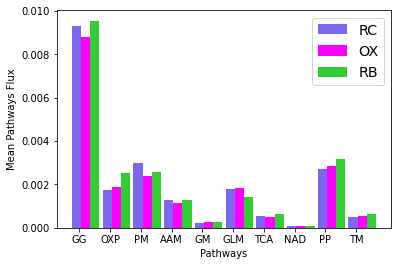

In [23]:
#Plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#Means of YMC stages in 10 metabolic pathways
RC_means = [GG[0][1], OXP[0][1],PM[0][1], AAM[0][1], GM[0][1], GLM[0][1], TCA[0][1], NAD[0][1], PP[0][1], TM[0][1]]
OX_means = [GG[0][2], OXP[0][2],PM[0][2], AAM[0][2], GM[0][2], GLM[0][2], TCA[0][2], NAD[0][2], PP[0][2], TM[0][2]]
RB_means = [GG[0][3], OXP[0][3],PM[0][3], AAM[0][3], GM[0][3], GLM[0][3], TCA[0][3], NAD[0][3], PP[0][3], TM[0][3]]

x = np.arange(len(list_path))
width = 0.30
fig, ax = plt.subplots()

#plot bars RC
rects1 = ax.bar(x - width/3, RC_means, width, label='RC',color='mediumslateblue')
#plot bars OX
rects2 = ax.bar(x + 0.2, OX_means, width, label='OX',color='magenta')
#plot bars RB
rects3 = ax.bar(x + 0.5, RB_means, width, label='RB',color='limegreen')

#Add labels
ax.set_ylabel('Mean Pathways Flux')
ax.set_xlabel('Pathways')
#ax.set_title('Yeast Metabolic Cycle')
ax.set_xticks(x)
ax.set_xticklabels(list_path)
ax.legend()
       
#Add legends
plt.legend(fontsize="x-large")
plt.savefig('Fig2D.pdf')
       